# Random Forest

In [2]:
# importer les librairies 
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
acc_score = make_scorer(accuracy_score)

In [4]:
df = pd.read_csv("titanic.csv",sep=",")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.dropna(subset=["Age"],inplace=True)
# df["age"].fillna(np.mean(df["age"]),inplace=True)
df["Age"] = df["Age"].astype(int)

In [8]:
# transformer de la variable sex
code = {"female":0, "male":1}
df["Sex"] = df["Sex"].map(code)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,S


In [18]:
df["Cabin"].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
C22 C26        3
              ..
C91            1
C124           1
C32            1
E34            1
C148           1
Name: count, Length: 134, dtype: int64

In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
df.drop(["PassengerId","Name","Ticket","Cabin"], axis=1, inplace=True)

In [24]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.634454,29.679272,0.512605,0.431373,34.694514
std,0.491460,0.838250,0.481921,14.536483,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


<Axes: xlabel='Age', ylabel='Count'>

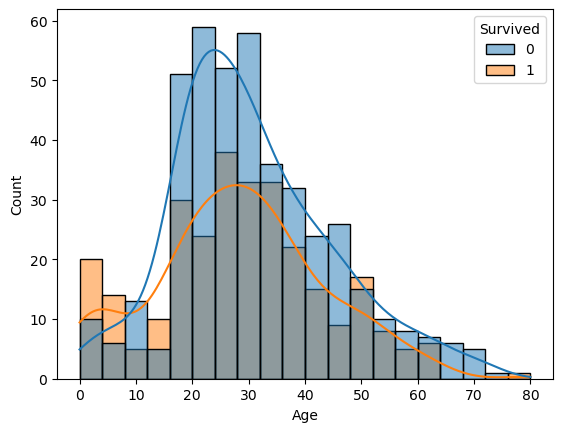

In [26]:
sns.histplot(df, x="Age", hue="Survived", kde=True, )

In [27]:
df["AgeBand"] = pd.cut(df["Age"], 5)

In [30]:
df[["AgeBand", "Survived"]].groupby("AgeBand", as_index=False).mean().sort_values(by="AgeBand", ascending=False)

C:\Users\yacine.medjbeur\AppData\Local\Temp\ipykernel_21864\1644055271.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[["AgeBand", "Survived"]].groupby("AgeBand", as_index=False).mean().sort_values(by="AgeBand", ascending=False)


,AgeBand,Survived
4,"(64.0, 80.0]",0.090909
3,"(48.0, 64.0]",0.434783
2,"(32.0, 48.0]",0.403226
1,"(16.0, 32.0]",0.370690
0,"(-0.08, 16.0]",0.550000


In [32]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,0,3,1,22,1,0,7.2500,S,"(16.0, 32.0]"
1,1,1,0,38,1,0,71.2833,C,"(32.0, 48.0]"
2,1,3,0,26,0,0,7.9250,S,"(16.0, 32.0]"
3,1,1,0,35,1,0,53.1000,S,"(32.0, 48.0]"
4,0,3,1,35,0,0,8.0500,S,"(32.0, 48.0]"


In [34]:
def classer_age(age):
    if age <= 16:
        return 0
    elif age > 16 and age <= 32:
        return 1
    elif age > 32 and age <= 48:
        return 2
    elif age > 48 and age <= 64:
        return 3
    else:
        return 4

In [36]:
df["Age"] = df["Age"].map(classer_age)

In [38]:
df.drop("AgeBand", axis=1, inplace=True)

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,1,1,0,7.2500,S
1,1,1,0,2,1,0,71.2833,C
2,1,3,0,1,0,0,7.9250,S
3,1,1,0,2,1,0,53.1000,S
4,0,3,1,2,0,0,8.0500,S


In [42]:
df["FareGroup"] = pd.cut(df["Fare"], 3)
df[["FareGroup","Survived"]].groupby("FareGroup", as_index=False).mean().sort_values(by="FareGroup", ascending=True)

C:\Users\yacine.medjbeur\AppData\Local\Temp\ipykernel_21864\2747349440.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[["FareGroup","Survived"]].groupby("FareGroup", as_index=False).mean().sort_values(by="FareGroup", ascending=True)


,FareGroup,Survived
0,"(-0.512, 170.776]",0.396552
1,"(170.776, 341.553]",0.733333
2,"(341.553, 512.329]",1.000000


In [44]:
def classe_fare(fare):
    if fare <= 10.462:
        return 0
    elif fare > 10.462 and fare <=26.55:
        return 1
    elif fare > 26.55:
        return 2

In [46]:
df["Fare"] = df["Fare"].map(classe_fare)
df["Fare"] = df["Fare"].astype(int)

In [48]:
df.drop("FareGroup", axis=1, inplace=True)

In [50]:
df["Fare"].unique()

array([0, 2, 1])

In [52]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

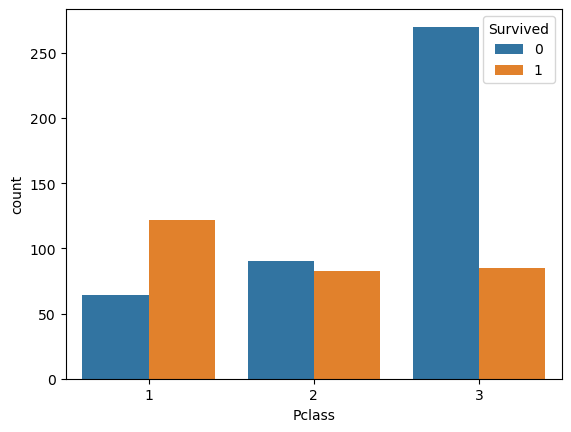

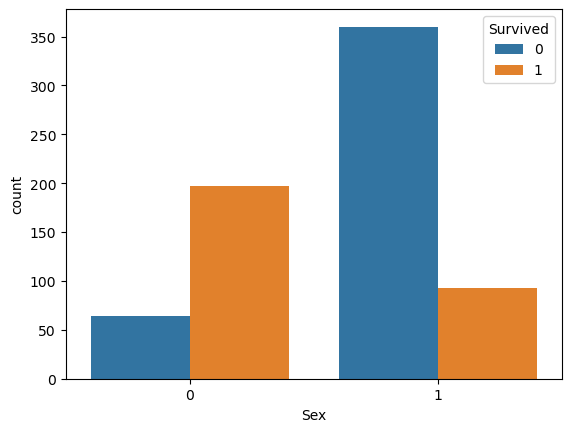

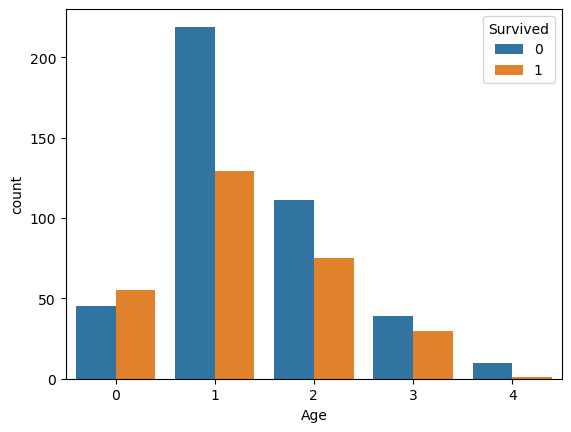

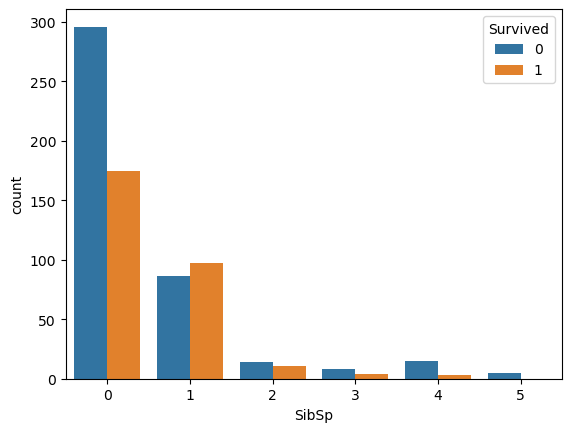

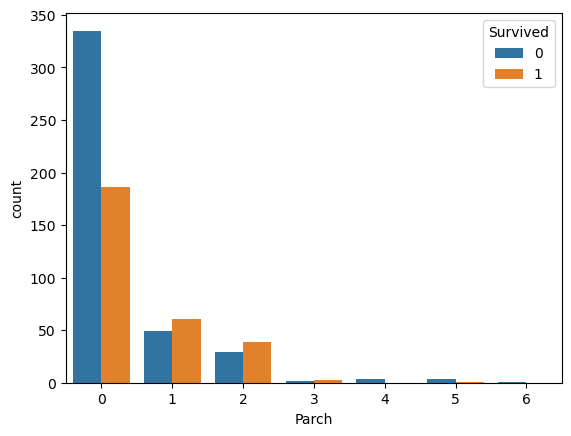

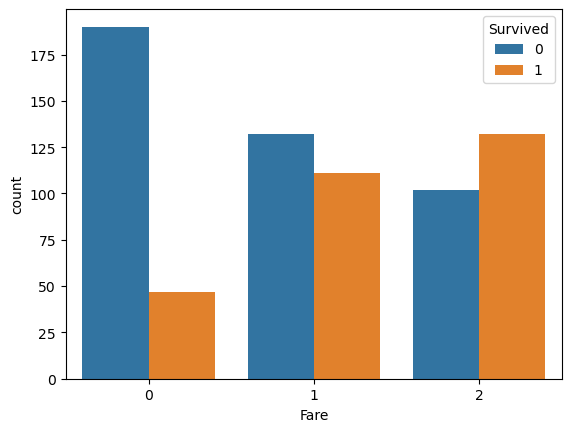

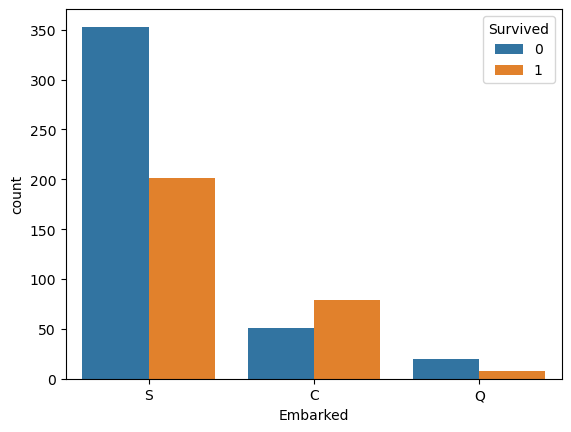

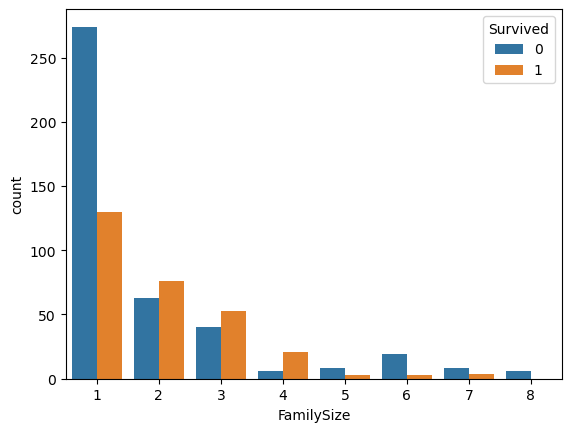

In [54]:
for col in df.drop(["Survived"], axis=1):
    plt.figure()
    sns.countplot(x=df[col], hue=df["Survived"])

In [56]:
df.drop(['SibSp','Parch'], axis=1, inplace=True)

In [58]:
X = df.drop(["Survived"], axis=1)
y = df["Survived"]
X.shape, y.shape

((714, 6), (714,))

In [60]:
X.drop(['Embarked','Pclass'], axis=1, inplace=True)

In [62]:
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [107]:
model = RandomForestClassifier()
param = {"n_estimators":[10,30],
        "criterion":["gini", "entropy", "log_loss"],
        "max_depth":[5,8]}
grid = GridSearchCV(model, param, cv=4, scoring="f1")
grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 8], 'n_estimators': [10, 30]},
             scoring='f1')

In [109]:
grid.best_params_

{'criterion': 'log_loss', 'max_depth': 5, 'n_estimators': 10}

In [111]:
grid.best_estimator_.score(X_test, y_test)

0.8186046511627907

In [113]:
grid.best_estimator_.score(X_train, y_train)

0.8216432865731463

In [117]:
y_pred = grid.best_estimator_.predict(X_test)

In [115]:
from sklearn.metrics import confusion_matrix, classification_report

In [119]:
confusion_matrix(y_pred, y_test)

array([[113,  27],
       [ 12,  63]], dtype=int64)

In [123]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       140
           1       0.70      0.84      0.76        75

    accuracy                           0.82       215
   macro avg       0.80      0.82      0.81       215
weighted avg       0.83      0.82      0.82       215

